In [1]:
import torch
import torch.nn.functional as F

In [2]:
words = open("names.txt", "r").read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

## Simple tokenization: each letter is an integer

In [4]:
chars = sorted(list(set("".join(words))))

In [5]:
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi["."] = 0
itos = {i:s for s,i in stoi.items()}

In [6]:
xs, ys = [], []


for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
len(xs)

228146

### Build one layer neural network

In [13]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn(len(stoi),len(stoi), requires_grad = True, generator = g)

In [14]:
xenc = F.one_hot(xs, num_classes = len(stoi)).float()
print(xs.shape)
print(xenc)

torch.Size([228146])
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 1., 0., 0.]])


### Train the neural network by minimizing the loss

In [15]:
for i in range(100):
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    num = xs.nelement()
    if i == 1:
        al = probs[torch.arange(num), ys]
        print(probs.shape)
        print(al.shape)
        print(al)
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()

    
    grads_before = W.grad.clone() if W.grad is not None else None
    
    W.grad = None
    loss.backward()
    W.data += - 30 * W.grad

print(loss.item())  

torch.Size([228146, 27])
torch.Size([228146])
tensor([0.0194, 0.0210, 0.0270,  ..., 0.0122, 0.0819, 0.0314],
       grad_fn=<IndexBackward0>)
2.503229856491089


### Build words

In [14]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    ix = 0
    out = []
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=len(stoi)).float()
        logits = xenc @ W
        counts = logits.exp()
        probs = counts / counts.sum(1, keepdims = True)
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator = g).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print("".join(out))
    

cexze
momasurailezityha
konimittain
llayn
ka
da
staiyauelalerigotai
moziellavo
ke
teda


### Draw our weights

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
W_np = W.detach().numpy()

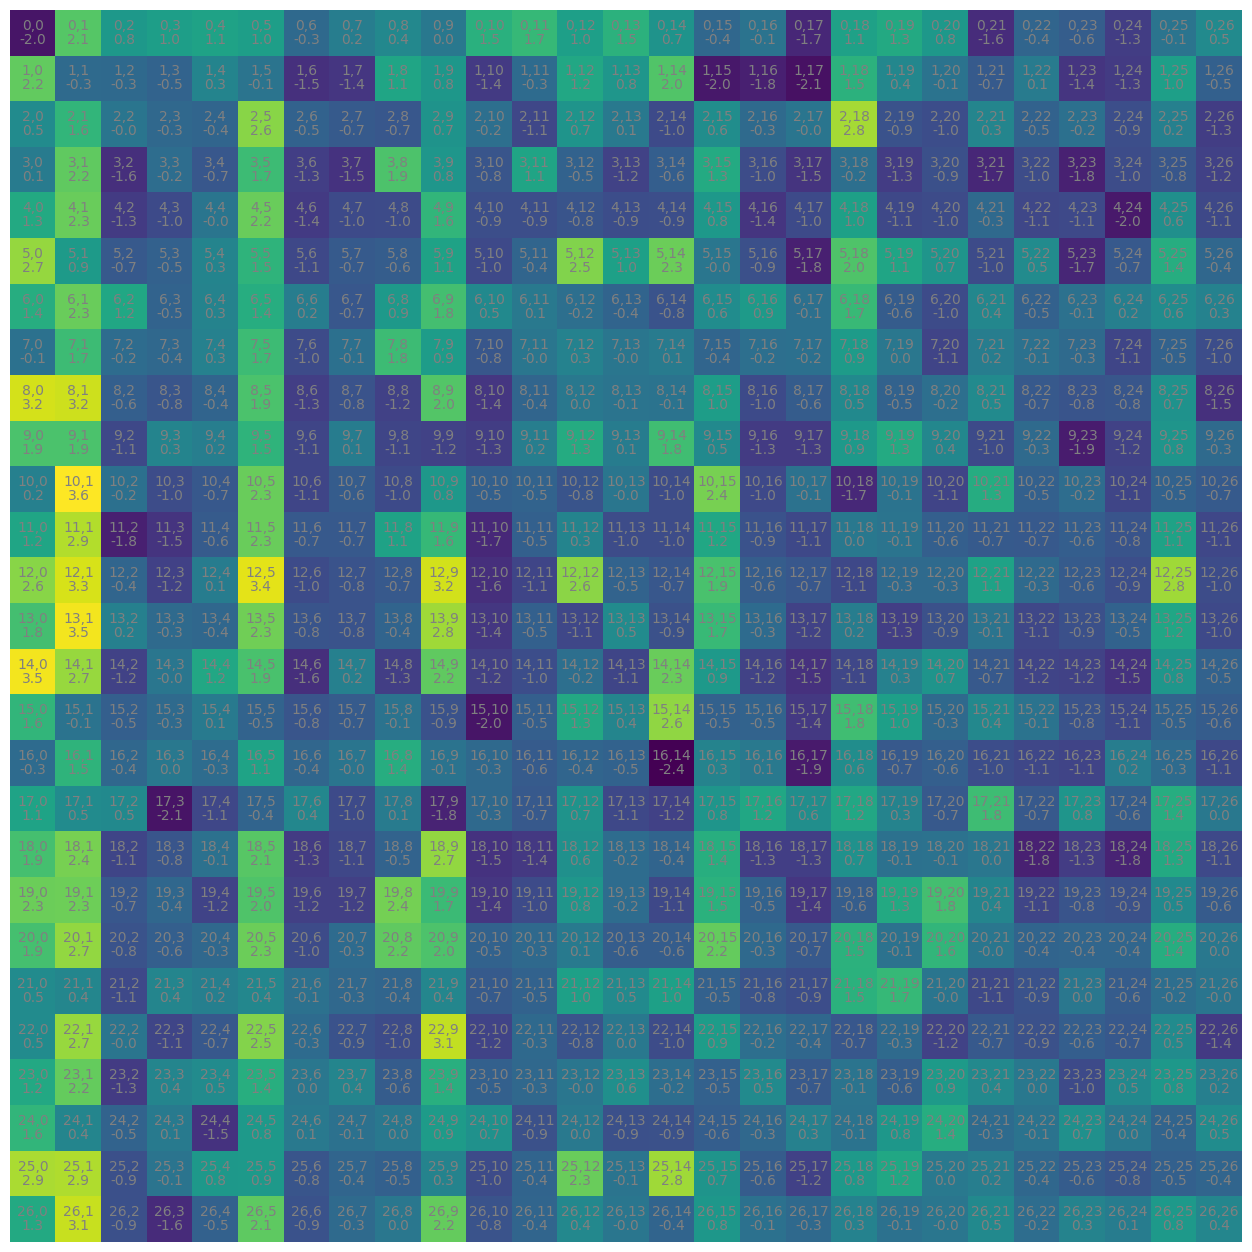

In [27]:
plt.figure(figsize=(16,16))
plt.imshow(W_np)
for i in range(len(stoi)):
    for j in range(len(stoi)):
        indexstr = str(i) + "," + str(j)
        plt.text(j, i, indexstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, f"{W_np[i][j]:.1f}",ha="center",va="top", color="gray")
    plt.axis("off")